In [2]:
import numpy
import cartopy
import matplotlib
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
import matplotlib.style as style
import os

from netCDF4 import Dataset
from xarray import DataArray

print("Done importing modules")

Done importing modules


In [3]:
GEOGRID_DIRECTORY = "/projects/jiko1138/ICA_04/"

lambert4040 = xr.open_dataset(GEOGRID_DIRECTORY + "lambert4040/geo_em.d01.nc")
lambert3060 = xr.open_dataset(GEOGRID_DIRECTORY + "lambert3060/geo_em.d01.nc")
mercator = xr.open_dataset(GEOGRID_DIRECTORY + "mercator/geo_em.d01.nc")
polar = xr.open_dataset(GEOGRID_DIRECTORY + "polar/geo_em.d01.nc")

print(polar)

<xarray.Dataset>
Dimensions:     (Time: 1, land_cat: 21, month: 12, soil_cat: 16, south_north: 399, south_north_stag: 400, west_east: 399, west_east_stag: 400)
Dimensions without coordinates: Time, land_cat, month, soil_cat, south_north, south_north_stag, west_east, west_east_stag
Data variables:
    Times       (Time) |S19 ...
    XLAT_M      (Time, south_north, west_east) float32 ...
    XLONG_M     (Time, south_north, west_east) float32 ...
    XLAT_V      (Time, south_north_stag, west_east) float32 ...
    XLONG_V     (Time, south_north_stag, west_east) float32 ...
    XLAT_U      (Time, south_north, west_east_stag) float32 ...
    XLONG_U     (Time, south_north, west_east_stag) float32 ...
    CLAT        (Time, south_north, west_east) float32 ...
    CLONG       (Time, south_north, west_east) float32 ...
    MAPFAC_M    (Time, south_north, west_east) float32 ...
    MAPFAC_V    (Time, south_north_stag, west_east) float32 ...
    MAPFAC_U    (Time, south_north, west_east_stag) flo

In [5]:
print('Lambert4040:')
print(np.max(lambert4040['MAPFAC_M'].values[0, :, :]),np.min(lambert4040['MAPFAC_M'].values[0, :, :]))
#print(np.max(lambert4040['XLAT_M'].values[0, :, :]),np.min(lambert4040['XLAT_M'].values[0, :, :]))

print('Lambert3060:')
print(np.max(lambert3060['MAPFAC_M'].values[0, :, :]),np.min(lambert3060['MAPFAC_M'].values[0, :, :]))

print('Polar:')
print(np.max(polar['MAPFAC_M'].values[0, :, :]),np.min(polar['MAPFAC_M'].values[0, :, :]))

print('Mercator:')
print(np.max(mercator['MAPFAC_M'].values[0, :, :]),np.min(mercator['MAPFAC_M'].values[0, :, :]))

Lambert4040:
1.0083015 0.9999999
Lambert3060:
0.99079096 0.9656477
Polar:
1.0679243 0.9464118
Mercator:
1.1188397 0.90812504


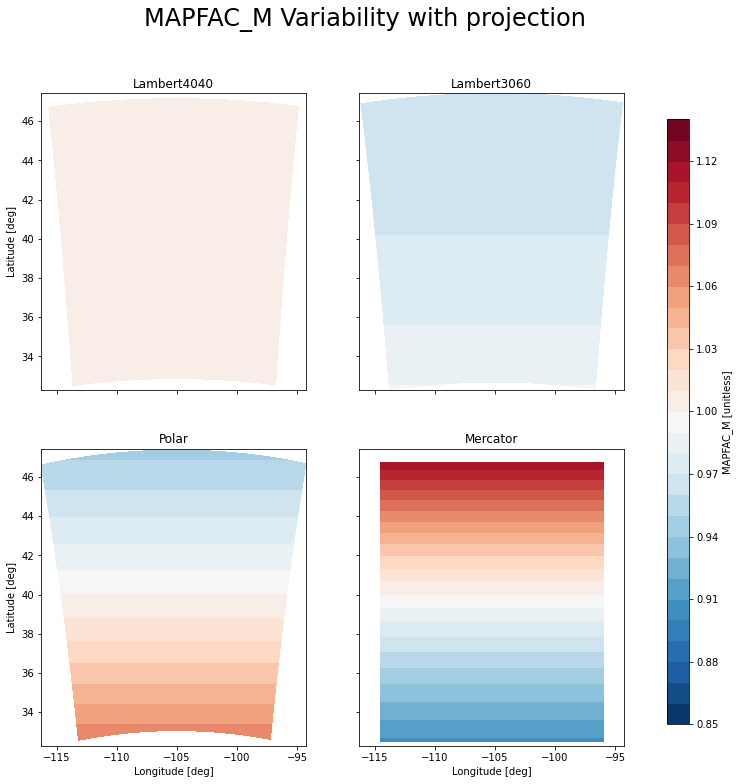

In [4]:
fig, ax = plt.subplots(2,2,figsize=(12,12), sharex=True, sharey=True)
# c_levels = np.linspace(0.6,1.4,0.05)
c_levels = numpy.arange(0.85, 1.15, 0.01)
                                                                 
im = ax[0,0].contourf(lambert4040['XLONG_M'].values[0, :, :],
    lambert4040['XLAT_M'].values[0, :, :],
    lambert4040['MAPFAC_M'].values[0, :, :], c_levels,
    cmap=plt.cm.RdBu_r)
ax[0,1].contourf(lambert3060['XLONG_M'].values[0, :, :],
    lambert3060['XLAT_M'].values[0, :, :],
    lambert3060['MAPFAC_M'].values[0, :, :], c_levels,
    cmap=plt.cm.RdBu_r)
ax[1,0].contourf(polar['XLONG_M'].values[0, :, :],
    polar['XLAT_M'].values[0, :, :],
    polar['MAPFAC_M'].values[0, :, :], c_levels,
    cmap=plt.cm.RdBu_r)
ax[1,1].contourf(mercator['XLONG_M'].values[0, :, :],
    mercator['XLAT_M'].values[0, :, :],
    mercator['MAPFAC_M'].values[0, :, :], c_levels,
    cmap=plt.cm.RdBu_r)

plt.suptitle("MAPFAC_M Variability with projection", fontsize=24)

ax[0,0].set_ylabel("Latitude [deg]")
ax[1,0].set_ylabel("Latitude [deg]")
ax[1,0].set_xlabel("Longitude [deg]")
ax[1,1].set_xlabel("Longitude [deg]")

ax[0,0].set_title("Lambert4040")
ax[0,1].set_title("Lambert3060")
ax[1,0].set_title("Polar")
ax[1,1].set_title("Mercator")

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.025, 0.7])
                                                                 
cbar = fig.colorbar(im, cax=cbar_ax)
cbar.set_label("MAPFAC_M [unitless]")

plt.show()

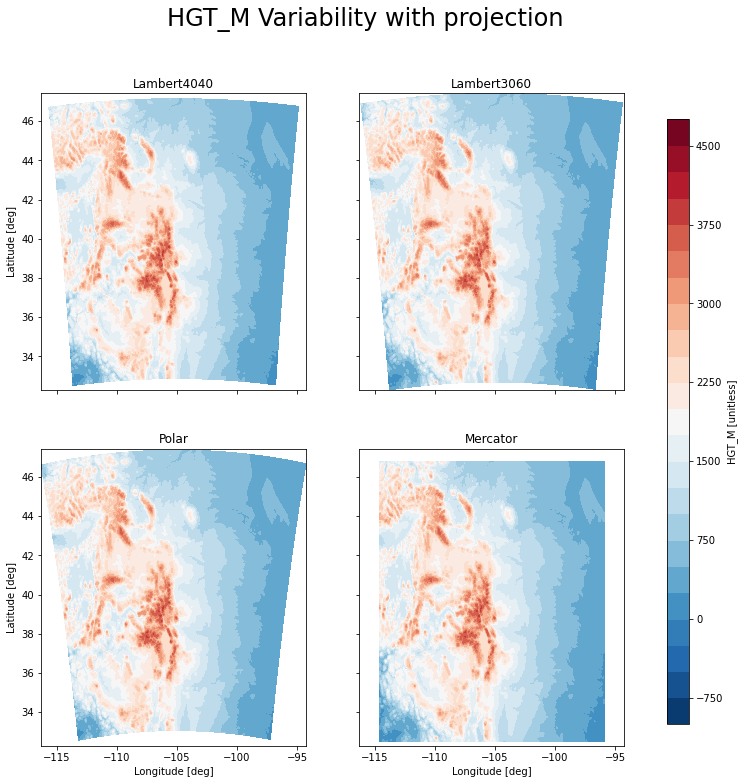

In [6]:
fig, ax = plt.subplots(2,2,figsize=(12,12), sharex=True, sharey=True)
# c_levels = np.linspace(0.6,1.4,0.05)
c_levels = numpy.arange(-1000, 5000, 250)
                                                                 
im = ax[0,0].contourf(lambert4040['XLONG_M'].values[0, :, :],
    lambert4040['XLAT_M'].values[0, :, :],
    lambert4040['HGT_M'].values[0, :, :], c_levels,
    cmap=plt.cm.RdBu_r)
ax[0,1].contourf(lambert3060['XLONG_M'].values[0, :, :],
    lambert3060['XLAT_M'].values[0, :, :],
    lambert3060['HGT_M'].values[0, :, :], c_levels,
    cmap=plt.cm.RdBu_r)
ax[1,0].contourf(polar['XLONG_M'].values[0, :, :],
    polar['XLAT_M'].values[0, :, :],
    polar['HGT_M'].values[0, :, :], c_levels,
    cmap=plt.cm.RdBu_r)
ax[1,1].contourf(mercator['XLONG_M'].values[0, :, :],
    mercator['XLAT_M'].values[0, :, :],
    mercator['HGT_M'].values[0, :, :], c_levels,
    cmap=plt.cm.RdBu_r)

plt.suptitle("HGT_M Variability with projection", fontsize=24)

ax[0,0].set_ylabel("Latitude [deg]")
ax[1,0].set_ylabel("Latitude [deg]")
ax[1,0].set_xlabel("Longitude [deg]")
ax[1,1].set_xlabel("Longitude [deg]")

ax[0,0].set_title("Lambert4040")
ax[0,1].set_title("Lambert3060")
ax[1,0].set_title("Polar")
ax[1,1].set_title("Mercator")

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.025, 0.7])
                                                                 
cbar = fig.colorbar(im, cax=cbar_ax)
cbar.set_label("HGT_M [unitless]")

plt.show()

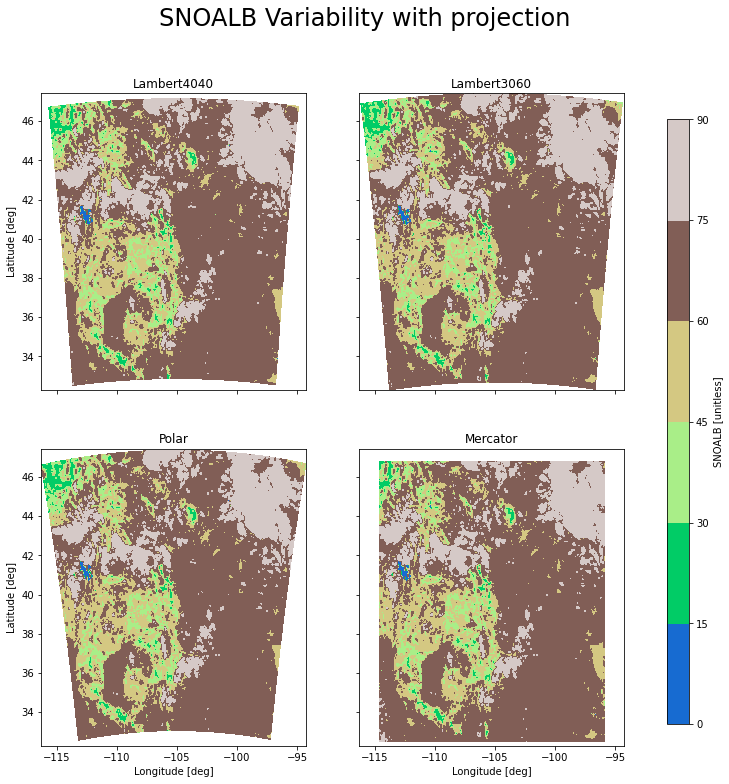

In [8]:

fig, ax = plt.subplots(2,2,figsize=(12,12), sharex=True, sharey=True)
                                                                 
im = ax[0,0].contourf(lambert4040['XLONG_M'].values[0, :, :],
    lambert4040['XLAT_M'].values[0, :, :],
    lambert4040['SNOALB'].values[0, :, :],
    cmap=plt.cm.terrain)
ax[0,1].contourf(lambert3060['XLONG_M'].values[0, :, :],
    lambert3060['XLAT_M'].values[0, :, :],
    lambert3060['SNOALB'].values[0, :, :],
    cmap=plt.cm.terrain)
ax[1,0].contourf(polar['XLONG_M'].values[0, :, :],
    polar['XLAT_M'].values[0, :, :],
    polar['SNOALB'].values[0, :, :],
    cmap=plt.cm.terrain)
ax[1,1].contourf(mercator['XLONG_M'].values[0, :, :],
    mercator['XLAT_M'].values[0, :, :],
    mercator['SNOALB'].values[0, :, :],
    cmap=plt.cm.terrain)

plt.suptitle("SNOALB Variability with projection", fontsize=24)

ax[0,0].set_ylabel("Latitude [deg]")
ax[1,0].set_ylabel("Latitude [deg]")
ax[1,0].set_xlabel("Longitude [deg]")
ax[1,1].set_xlabel("Longitude [deg]")

ax[0,0].set_title("Lambert4040")
ax[0,1].set_title("Lambert3060")
ax[1,0].set_title("Polar")
ax[1,1].set_title("Mercator")

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.025, 0.7])
                                                                 
cbar = fig.colorbar(im, cax=cbar_ax)
cbar.set_label("SNOALB [unitless]")

plt.show()